In [33]:
import pandas as pd
import numpy as np 


In [34]:
df =pd.read_csv("credit_risk_dataset.csv")

In [35]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


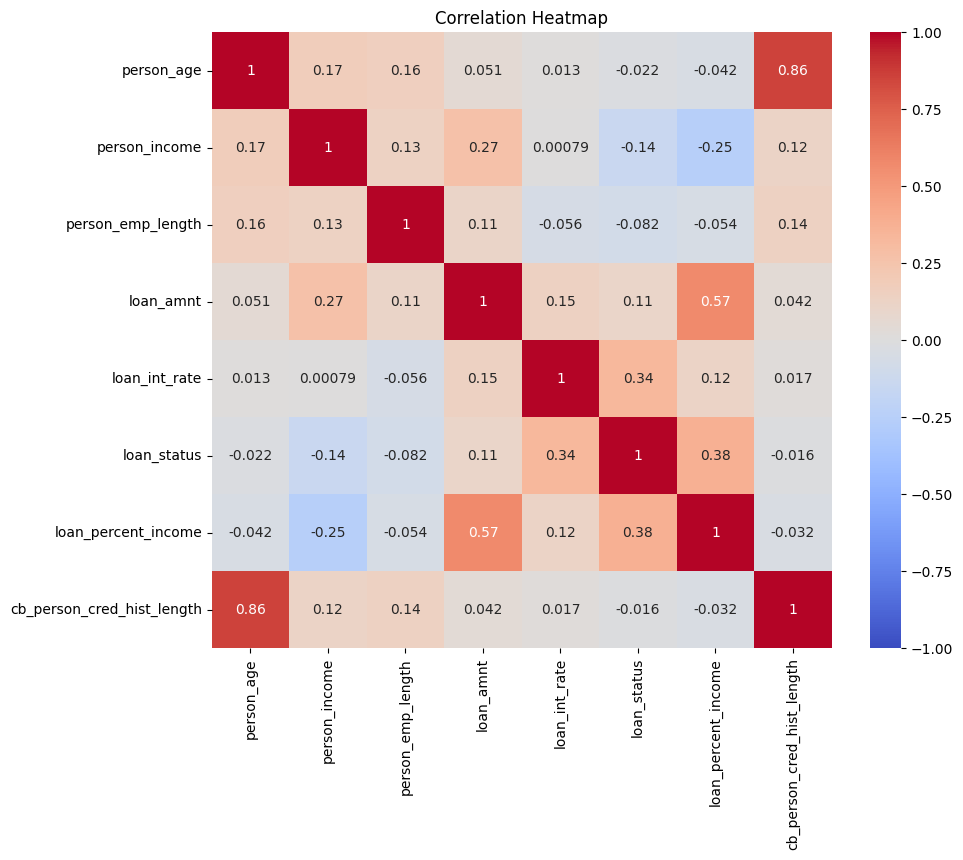

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=df[	["person_age",	"person_income",	"person_emp_length",	"loan_amnt"	,"loan_int_rate"	,"loan_status",	"loan_percent_income"	,"cb_person_cred_hist_length"]]

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_percent_income', ylabel='Count'>

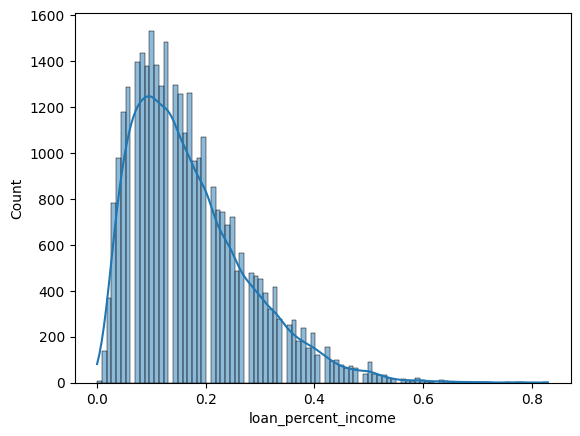

In [37]:
sns.histplot(df1["loan_percent_income"],kde=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_int_rate', ylabel='Count'>

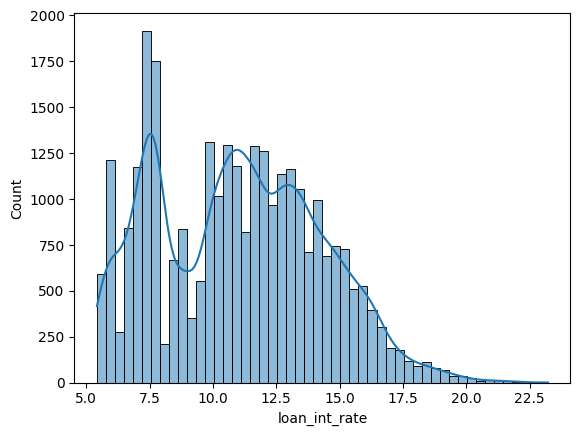

In [38]:
sns.histplot(df1["loan_int_rate"],kde=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [40]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [41]:
nullcols=df.columns[df.isnull().any()]
nullcount=df[nullcols].isnull().sum()
print(nullcount)

person_emp_length     895
loan_int_rate        3116
dtype: int64


In [42]:
df["loan_int_rate"]=df["loan_int_rate"].fillna(np.mean(df["loan_int_rate"]))

In [43]:
df["person_emp_length"]=df["person_emp_length"].fillna(round(np.mean(df["person_emp_length"])))

In [44]:
nullcols=df.columns[df.isnull().any()]
nullcount=df[nullcols].isnull().sum()
print(nullcount)

Series([], dtype: float64)


In [45]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [46]:
categorial=[]
for column in df.columns:
    if (df[column]).dtypes==object:
        categorial.append(column)
print(categorial)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [47]:
non_categorial=[]
for column in df.columns:
    if (df[column]).dtypes!=object:
        non_categorial.append(column)
print(non_categorial)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [48]:
encoded_features = pd.concat(
    [pd.get_dummies(df[col], prefix=col,dtype=int) for col in categorial],axis=1
    ) 

In [49]:
encoded_features

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
32577,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
32578,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
32579,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [50]:
df1=pd.concat([encoded_features,df[non_categorial]],axis=1)


In [51]:
df1['loan_status'].replace(0,2,inplace=True)
df1['loan_status'].replace(1,0,inplace=True)
df1['loan_status'].replace(2,1,inplace=True)

In [52]:
df1['loan_status'].sum()

25473

In [53]:
df1.drop("loan_percent_income",axis=1)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,22,59000,123.0,35000,16.02,0,3
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,21,9600,5.0,1000,11.14,1,2
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,25,9600,1.0,5500,12.87,0,3
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,23,65500,4.0,35000,15.23,0,2
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,24,54400,8.0,35000,14.27,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0,...,0,1,0,57,53000,1.0,5800,13.16,1,30
32577,1,0,0,0,0,0,0,0,1,0,...,0,1,0,54,120000,4.0,17625,7.49,1,19
32578,0,0,0,1,0,0,1,0,0,0,...,0,1,0,65,76000,3.0,35000,10.99,0,28
32579,1,0,0,0,0,0,0,0,1,0,...,0,1,0,56,150000,5.0,15000,11.48,1,26


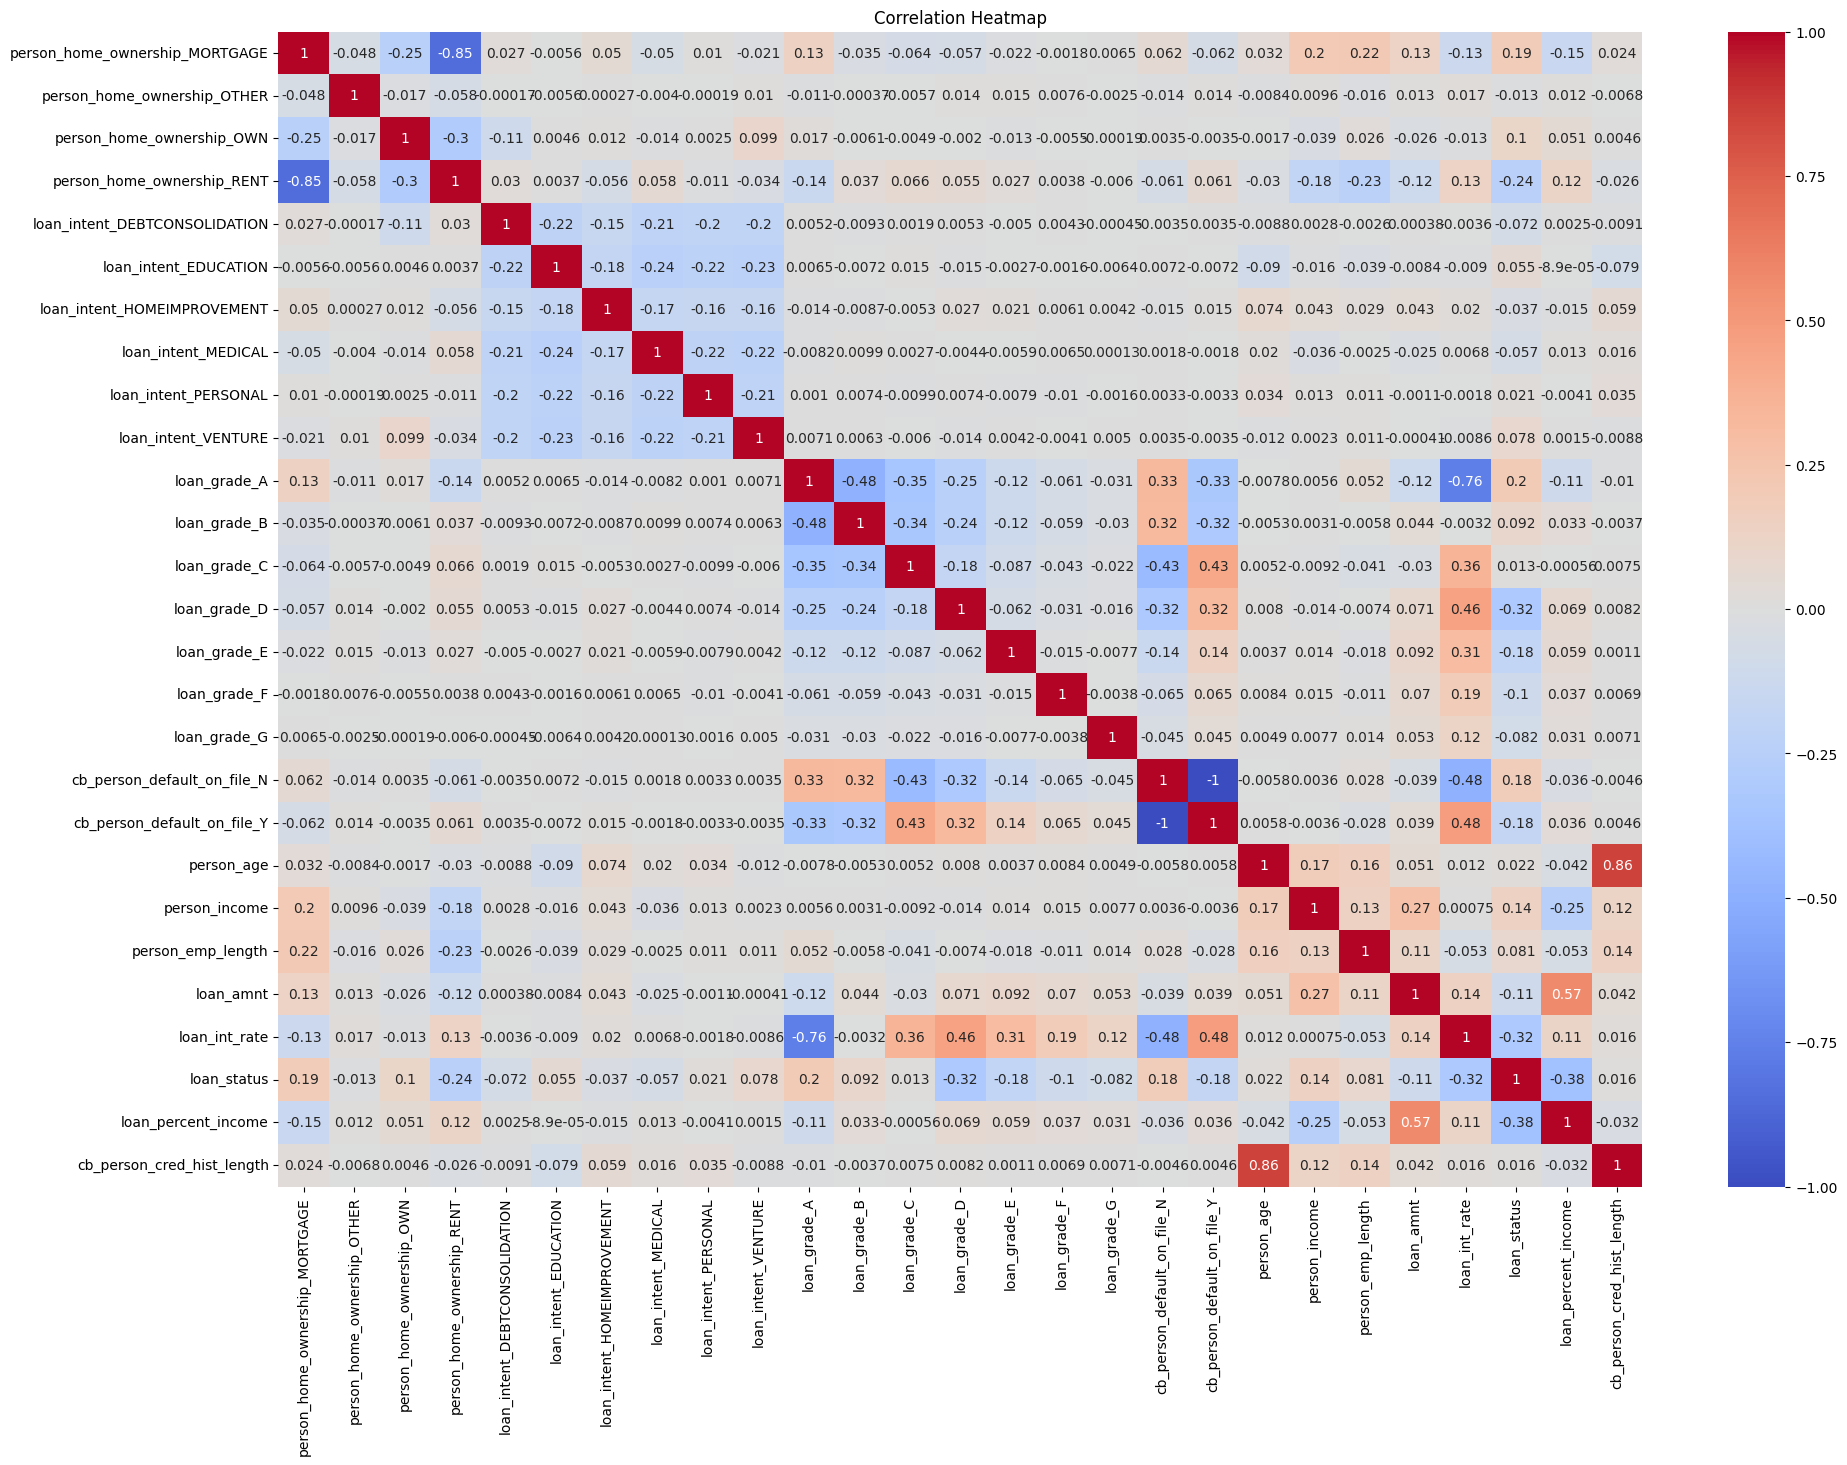

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(22, 15))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


In [55]:
df1.columns

Index(['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y', 'person_age', 'person_income',
       'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status',
       'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [56]:
df1.describe()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,0.412633,0.003284,0.079310,0.504773,0.159971,0.198060,0.110647,0.186336,0.169455,0.175532,...,0.823670,0.176330,27.734600,6.607485e+04,4.795464,9589.371106,11.011695,0.781836,0.170203,5.804211
std,0.492315,0.057214,0.270226,0.499985,0.366584,0.398544,0.313700,0.389383,0.375159,0.380427,...,0.381106,0.381106,6.348078,6.198312e+04,4.085478,6322.086646,3.081605,0.413006,0.106782,4.055001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,1.000000,0.090000,3.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,1.000000,0.150000,4.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,1.000000,0.230000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [57]:
import pickle
from sklearn.preprocessing import StandardScaler
features_to_normalize=["person_age",	"person_income",	"person_emp_length",	"loan_amnt",	"cb_person_cred_hist_length"]
scaler=StandardScaler()
scaler.fit(df1[features_to_normalize])
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [58]:
df1[features_to_normalize]=scaler.transform(df1[features_to_normalize])

In [59]:
df1.describe()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,3.258100e+04,3.258100e+04,3.258100e+04,32581.000000,32581.000000,32581.000000,3.258100e+04
mean,0.412633,0.003284,0.079310,0.504773,0.159971,0.198060,0.110647,0.186336,0.169455,0.175532,...,0.823670,0.176330,0.000000,5.582976e-17,-8.374464e-17,-5.582976e-17,11.011695,0.781836,0.170203,-5.582976e-17
std,0.492315,0.057214,0.270226,0.499985,0.366584,0.398544,0.313700,0.389383,0.375159,0.380427,...,0.381106,0.381106,1.000015,1.000015e+00,1.000015e+00,1.000015e+00,3.081605,0.413006,0.106782,1.000015e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.218435,-1.001495e+00,-1.173801e+00,-1.437739e+00,5.420000,0.000000,0.000000,-9.381673e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-0.745843,-4.448836e-01,-6.842545e-01,-7.259378e-01,8.490000,1.000000,0.090000,-6.915544e-01
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-0.273252,-1.786780e-01,-1.947082e-01,-2.514036e-01,11.011695,1.000000,0.150000,-4.449416e-01
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.356869,2.117569e-01,5.396114e-01,4.129442e-01,13.110000,1.000000,0.230000,5.415097e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,18.315335,9.573601e+01,2.893330e+01,4.019404e+00,23.220000,1.000000,0.830000,5.966992e+00


In [60]:
X=df1.drop("loan_status",axis=1)
y=df1.drop(X,axis=1)
X

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,-0.903374,-0.114143,28.933299,4.019404,16.02,0.59,-0.691554
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,-1.060904,-0.911147,0.050065,-1.358650,11.14,0.10,-0.938167
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,-0.430783,-0.911147,-0.929028,-0.646849,12.87,0.57,-0.691554
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,-0.745843,-0.009274,-0.194708,4.019404,15.23,0.53,-0.938167
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,-0.588313,-0.188358,0.784385,4.019404,14.27,0.55,-0.444942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0,...,0,1,0,4.610190,-0.210945,-0.929028,-0.599395,13.16,0.11,5.966992
32577,1,0,0,0,0,0,0,0,1,0,...,0,1,0,4.137599,0.870011,-0.194708,1.271060,7.49,0.15,3.254251
32578,0,0,0,1,0,0,1,0,0,0,...,0,1,0,5.870433,0.160129,-0.439481,4.019404,10.99,0.46,5.473767
32579,1,0,0,0,0,0,0,0,1,0,...,0,1,0,4.452660,1.354021,0.050065,0.855843,11.48,0.10,4.980541


<i><h4>--------------------------------------------------------LOGISTIC REGRESSION----------------------------------------------------------

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
x_train.shape

(26064, 26)

In [63]:
x_test.head(10)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
14668,0,0,1,0,0,0,1,0,0,0,...,0,1,0,-0.588313,-0.614287,0.294838,0.064952,10.370000,0.36,-0.938167
24614,0,0,0,1,0,0,0,0,1,0,...,0,0,1,-0.115722,-0.033475,-1.173801,0.064952,15.270000,0.16,1.034735
11096,1,0,0,0,0,1,0,0,0,0,...,0,1,0,-0.273252,0.095594,1.273931,1.014021,11.011695,0.22,-0.691554
10424,0,0,0,1,1,0,0,0,0,0,...,0,1,0,-0.745843,-0.614352,0.539611,0.064952,11.011695,0.36,-0.938167
26007,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0.356869,-0.348082,-0.684254,0.539487,16.320000,0.29,0.048284
9614,1,0,0,0,0,0,1,0,0,0,...,0,1,0,-0.430783,-0.049609,-0.684254,1.646733,9.990000,0.32,-0.938167
6204,0,0,0,1,0,0,0,0,0,1,...,0,1,0,-0.273252,-0.629921,-0.684254,-0.567760,9.990000,0.22,-0.444942
19286,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0.356869,-0.420683,0.784385,-1.121383,5.790000,0.06,1.034735
10297,0,0,0,1,1,0,0,0,0,0,...,0,0,1,-0.273252,0.386001,-0.684254,0.001681,13.850000,0.11,-0.444942
20560,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1.144521,-0.400758,0.539611,-1.042294,7.140000,0.07,0.788123


In [64]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000,solver='saga',penalty='l1',)
log_reg.fit(x_train,y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [65]:
y_pred=log_reg.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_log_reg=accuracy_score(y_test,y_pred)
confusion_log_reg=confusion_matrix(y_test,y_pred)
classification_log_reg=classification_report(y_test,y_pred)

In [67]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Confusion Matrix:\n", confusion_log_reg)
print("Classification Report:\n", classification_log_reg)

Logistic Regression Accuracy: 0.8608255332208071
Confusion Matrix:
 [[ 768  677]
 [ 230 4842]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63      1445
           1       0.88      0.95      0.91      5072

    accuracy                           0.86      6517
   macro avg       0.82      0.74      0.77      6517
weighted avg       0.85      0.86      0.85      6517



In [68]:
y_pred_proba_log_reg=log_reg.predict_proba(x_test)
y_pred_log_reg_prob_positive=y_pred_proba_log_reg[:,1]

In [69]:
print(y_pred_log_reg_prob_positive[:10])

[0.79473764 0.79990179 0.64292217 0.32578375 0.07852743 0.76078229
 0.79786096 0.96902015 0.81421441 0.99153355]


In [70]:
import pickle
with open("Logistic_regression_model.pkl","wb") as model_log_file:
    pickle.dump(log_reg, model_log_file)


In [95]:

# Example input from questionnaire
input_data = {
    "person_home_ownership": "RENT",
    "loan_intent": "DEBTCONSOLIDATION",
    "loan_grade": "C",
    "cb_person_default_on_file": "Y",
    "person_age": 21,
    "person_income": 90000,
    "person_emp_length": 2,
    "loan_amnt": 9600,
    "loan_int_rate": 13.85,
    "loan_percent_income": 0,
    "cb_person_cred_hist_length": 4
}
# Initialize a dictionary with all binary features set to 0
features = {
    'person_home_ownership_MORTGAGE': 0,
    'person_home_ownership_OTHER': 0,
    'person_home_ownership_OWN': 0,
    'person_home_ownership_RENT': 0,
    'loan_intent_DEBTCONSOLIDATION': 0,
    'loan_intent_EDUCATION': 0,
    'loan_intent_HOMEIMPROVEMENT': 0,
    'loan_intent_MEDICAL': 0,
    'loan_intent_PERSONAL': 0,
    'loan_intent_VENTURE': 0,
    'loan_grade_A': 0,
    'loan_grade_B': 0,
    'loan_grade_C': 0,
    'loan_grade_D': 0,
    'loan_grade_E': 0,
    'loan_grade_F': 0,
    'loan_grade_G': 0,
    'cb_person_default_on_file_N': 0,
    'cb_person_default_on_file_Y': 0,
    'person_age': input_data['person_age'],
    'person_income': input_data['person_income'],
    'person_emp_length': input_data['person_emp_length'],
    'loan_amnt': input_data['loan_amnt'],
    'loan_int_rate': input_data['loan_int_rate'],
    "loan_percent_income":0,
    'cb_person_cred_hist_length': input_data['cb_person_cred_hist_length']
}
													
# Update binary features based on input data
features[f'person_home_ownership_{input_data["person_home_ownership"]}'] = 1
features[f'loan_intent_{input_data["loan_intent"]}'] = 1
features[f'loan_grade_{input_data["loan_grade"]}'] = 1
features[f'loan_percent_income']=input_data["loan_amnt"]/input_data["person_income"]
features[f'cb_person_default_on_file_{input_data["cb_person_default_on_file"]}'] = 1

input_features = pd.DataFrame([features])
# from sklearn.preprocessing import StandardScaler
# input_features_to_normalize=["person_age",	"person_income",	"person_emp_length",	"loan_amnt",	"loan_int_rate",	"cb_person_cred_hist_length"]
# scaler=StandardScaler()
# scaler.fit(input_features[input_features_to_normalize])
# input_features[input_features_to_normalize]=scaler.transform(input_features[input_features_to_normalize])

# Convert the dictionary to a DataFrame

with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model_l_r = pickle.load(model_file)

with open('scaler.pkl', 'rb') as file:
    sfile=pickle.load(file)

input_features[features_to_normalize]=sfile.transform(input_features[features_to_normalize])


In [96]:
y_pred_proba=loaded_model_l_r.predict_proba(input_features)
y_pred_positive=y_pred_proba[0,1]

In [97]:
print(f"Probability of loan being approved (loanstatus=1): {round(((y_pred_positive)*100),2)} %")
print(loaded_model_l_r.predict(input_features))

Probability of loan being approved (loanstatus=1): 81.55 %
[1]


<i><h4>--------------------------------------------------RANDOM FOREST CLASSIFICATION---------------------------------------------------

In [74]:
from sklearn.ensemble import RandomForestClassifier
RanFor=RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=5,min_samples_leaf=5)
RanFor.fit(x_train,y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=5)

In [75]:
y_pred_rf=RanFor.predict(x_test)

In [76]:
accuracy_RanFor=accuracy_score(y_test,y_pred_rf)
confusion_RanFor=confusion_matrix(y_test,y_pred_rf)
report_RanFor=classification_report(y_test,y_pred_rf)


In [77]:
print(f'Accuracy for Random Forest:\n {accuracy_RanFor}')
print(f'Confusion matrix for Random Forest:\n {confusion_RanFor}')
print(f'Classification report for Random Forest:\n {report_RanFor}')

Accuracy for Random Forest:
 0.9306429338652754
Confusion matrix for Random Forest:
 [[1017  428]
 [  24 5048]]
Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82      1445
           1       0.92      1.00      0.96      5072

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [78]:
y_Pred_proba_rf=RanFor.predict_proba(x_test)
y_pred_proba_rf_positive=y_Pred_proba_rf[:,1]

In [79]:
print(y_pred_proba_rf_positive[:10])

[0.94540999 0.82407043 0.83057006 0.02900383 0.08578068 0.89938918
 0.98602627 0.98482086 0.94506093 0.99646989]


In [80]:
import pickle
with open("Random_Forest_model.pkl","wb") as model_file:
    pickle.dump(RanFor,model_file)

In [92]:

# Example input from questionnaire

input_data = {
    "person_home_ownership": "OWN",
    "loan_intent": "VENTURE",
    "loan_grade": "A",
    "cb_person_default_on_file": "N",
    "person_age": 40,
    "person_income": 750000,
    "person_emp_length": 25,
    "loan_amnt": 650000,
    "loan_int_rate": 5.6,
    "loan_percent_income": 0,
    "cb_person_cred_hist_length": 8
}
# Initialize a dictionary with all binary features set to 0
features = {
    'person_home_ownership_MORTGAGE': 0,
    'person_home_ownership_OTHER': 0,
    'person_home_ownership_OWN': 0,
    'person_home_ownership_RENT': 0,
    'loan_intent_DEBTCONSOLIDATION': 0,
    'loan_intent_EDUCATION': 0,
    'loan_intent_HOMEIMPROVEMENT': 0,
    'loan_intent_MEDICAL': 0,
    'loan_intent_PERSONAL': 0,
    'loan_intent_VENTURE': 0,
    'loan_grade_A': 0,
    'loan_grade_B': 0,
    'loan_grade_C': 0,
    'loan_grade_D': 0,
    'loan_grade_E': 0,
    'loan_grade_F': 0,
    'loan_grade_G': 0,
    'cb_person_default_on_file_N': 0,
    'cb_person_default_on_file_Y': 0,
    'person_age': input_data['person_age'],
    'person_income': input_data['person_income'],
    'person_emp_length': input_data['person_emp_length'],
    'loan_amnt': input_data['loan_amnt'],
    'loan_int_rate': input_data['loan_int_rate'],
    "loan_percent_income":0,
    'cb_person_cred_hist_length': input_data['cb_person_cred_hist_length']
}
													
# Update binary features based on input data
features[f'person_home_ownership_{input_data["person_home_ownership"]}'] = 1
features[f'loan_intent_{input_data["loan_intent"]}'] = 1
features[f'loan_grade_{input_data["loan_grade"]}'] = 1
features[f'loan_percent_income']=input_data["loan_amnt"]/input_data["person_income"]
features[f'cb_person_default_on_file_{input_data["cb_person_default_on_file"]}'] = 1

input_features = pd.DataFrame([features])
# from sklearn.preprocessing import StandardScaler
# input_features_to_normalize=["person_age",	"person_income",	"person_emp_length",	"loan_amnt",	"loan_int_rate",	"cb_person_cred_hist_length"]
# scaler=StandardScaler()
# scaler.fit(input_features[input_features_to_normalize])
# input_features[input_features_to_normalize]=scaler.transform(input_features[input_features_to_normalize])

# Convert the dictionary to a DataFrame

with open('Random_Forest_model.pkl', 'rb') as model_file_rf:
    loaded_model_r_f = pickle.load(model_file_rf)

with open('scaler.pkl', 'rb') as file:
    sfile=pickle.load(file)

input_features[features_to_normalize]=sfile.transform(input_features[features_to_normalize])

In [93]:
y_Pred_proba_rf=loaded_model_r_f.predict_proba(input_features)
y_pred_proba_rf_positive=y_Pred_proba_rf[0,1]

In [94]:

print(f"Probability of loan being approved (loanstatus=1): {round(((y_pred_proba_rf_positive)*100),2)} %")
print(RanFor.predict(input_features))

Probability of loan being approved (loanstatus=1): 85.99 %
[1]
